In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df_mt = pd.read_csv(r"C:\Users\hi\Downloads\PHONE PE\Extracted_tables\4 Map Transaction.csv")

* Data Profiling

In [4]:
print("shape",df_mt.shape)
display(df_mt.head(5))
print("_______________________________________________________________________________________________________")
print("---- CHECKING NULL VALUES ----")
print(df_mt.isnull().sum()) 
print("_______________________________________________________________________________________________________")
print("---- DROP NULL VALUES ----")
display(df_mt.drop_duplicates())
print("_______________________________________________________________________________________________________")
print("---- SUMMARY STATISTICS ----")
display(df_mt.describe())
print("_______________________________________________________________________________________________________")
print("---- CHECKING DATATYPES ----")
print(df_mt.dtypes)

shape (19028, 6)


,State,Year,Quarter,District,Transaction_count,Transaction_amount
0,Andaman And Nicobar Islands,2018,1,north and middle andaman district,442,9.316631e+05
1,Andaman And Nicobar Islands,2018,1,south andaman district,5688,1.256025e+07
2,Andaman And Nicobar Islands,2018,1,nicobars district,528,1.139849e+06
3,Andaman And Nicobar Islands,2018,2,north and middle andaman district,825,1.317863e+06
4,Andaman And Nicobar Islands,2018,2,south andaman district,9395,2.394824e+07


_______________________________________________________________________________________________________
---- CHECKING NULL VALUES ----
State                 0
Year                  0
Quarter               0
District              0
Transaction_count     0
Transaction_amount    0
dtype: int64
_______________________________________________________________________________________________________
---- DROP NULL VALUES ----


,State,Year,Quarter,District,Transaction_count,Transaction_amount
0,Andaman And Nicobar Islands,2018,1,north and middle andaman district,442,9.316631e+05
1,Andaman And Nicobar Islands,2018,1,south andaman district,5688,1.256025e+07
2,Andaman And Nicobar Islands,2018,1,nicobars district,528,1.139849e+06
3,Andaman And Nicobar Islands,2018,2,north and middle andaman district,825,1.317863e+06
4,Andaman And Nicobar Islands,2018,2,south andaman district,9395,2.394824e+07
...,...,...,...,...,...,...
19023,West Bengal,2024,2,nadia district,49543213,8.588943e+10
19024,West Bengal,2024,2,birbhum district,29485233,4.969443e+10
19025,West Bengal,2024,2,purba medinipur district,55342585,9.889789e+10
19026,West Bengal,2024,2,maldah district,52271735,9.043206e+10


_______________________________________________________________________________________________________
---- SUMMARY STATISTICS ----


,Year,Quarter,Transaction_count,Transaction_amount
count,19028.000000,19028.000000,1.902800e+04,1.902800e+04
mean,2020.769813,2.423218,9.525118e+06,1.456677e+10
std,1.887181,1.115424,4.017948e+07,5.204544e+10
min,2018.000000,1.000000,2.000000e+00,1.698886e+02
25%,2019.000000,1.000000,2.230465e+05,4.058431e+08
50%,2021.000000,2.000000,1.260821e+06,2.371832e+09
75%,2022.000000,3.000000,6.341185e+06,1.104447e+10
max,2024.000000,4.000000,1.497173e+09,1.753799e+12


_______________________________________________________________________________________________________
---- CHECKING DATATYPES ----
State                  object
Year                    int64
Quarter                 int64
District               object
Transaction_count       int64
Transaction_amount    float64
dtype: object


In [5]:
df_mt1 = df_mt.copy()
df_mt1['Year']=df_mt1['Year'].astype(str)
df_mt1['Quarter']=df_mt1['Quarter'].astype(str)
display(df_mt1.dtypes)

State                  object
Year                   object
Quarter                object
District               object
Transaction_count       int64
Transaction_amount    float64
dtype: object

* Univarient Analysis

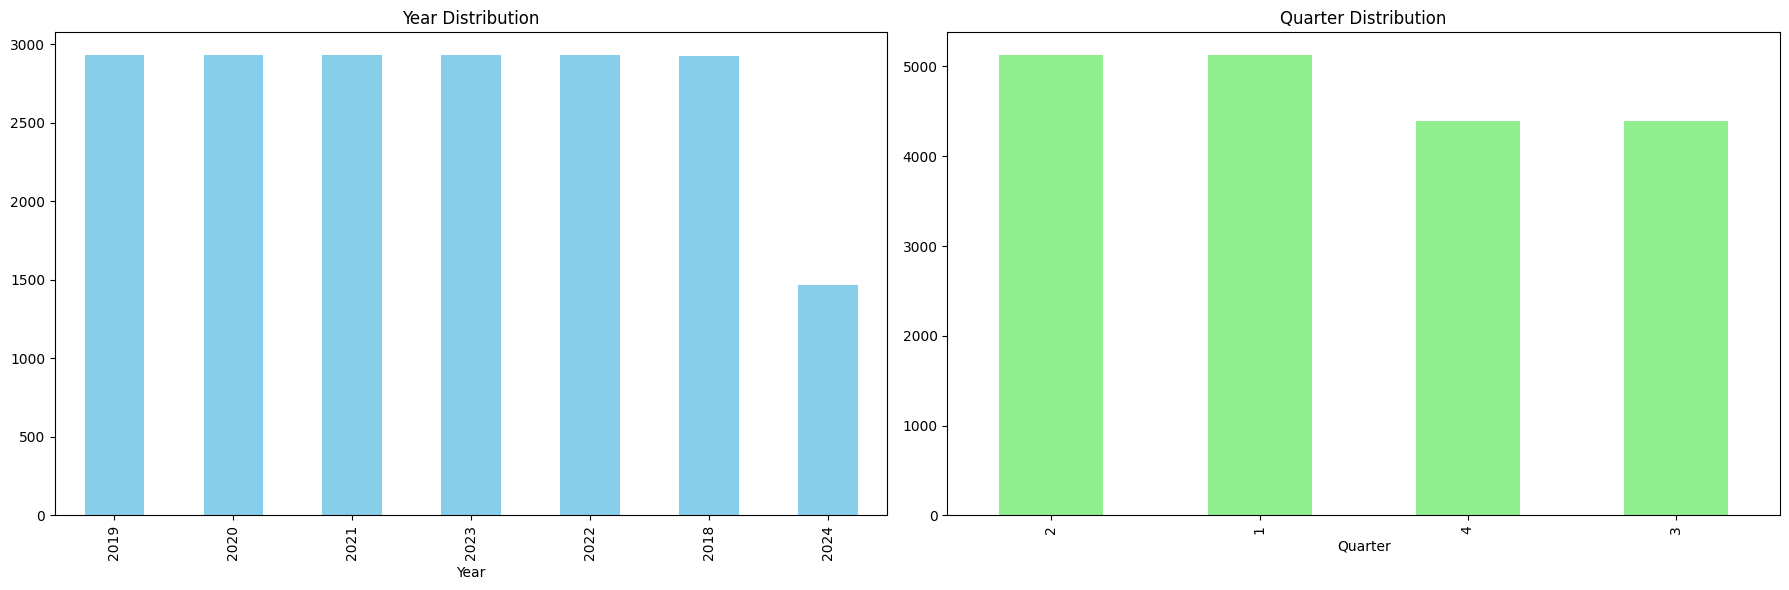

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
df_mt1['Year'].value_counts().plot.bar(ax=axs[0], color='skyblue')
axs[0].set_title('Year Distribution')

df_mt1['Quarter'].value_counts().plot.bar(ax=axs[1], color='lightgreen')
axs[1].set_title('Quarter Distribution')

plt.tight_layout()
plt.show()

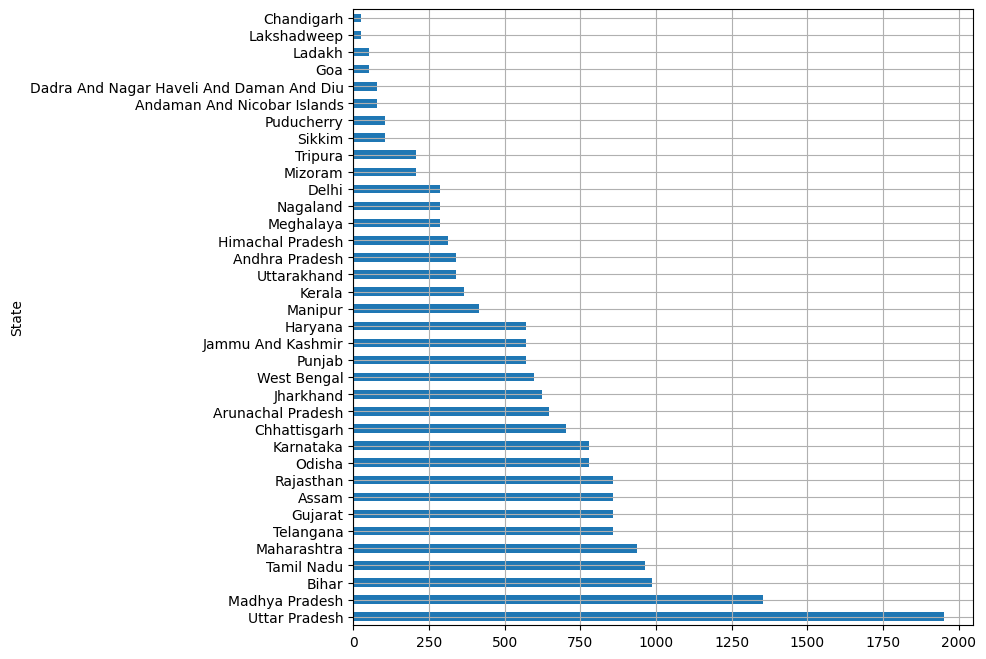

In [7]:
plt.figure(figsize=(8, 8))
df_mt1['State'].value_counts().plot.barh()
plt.grid(True)

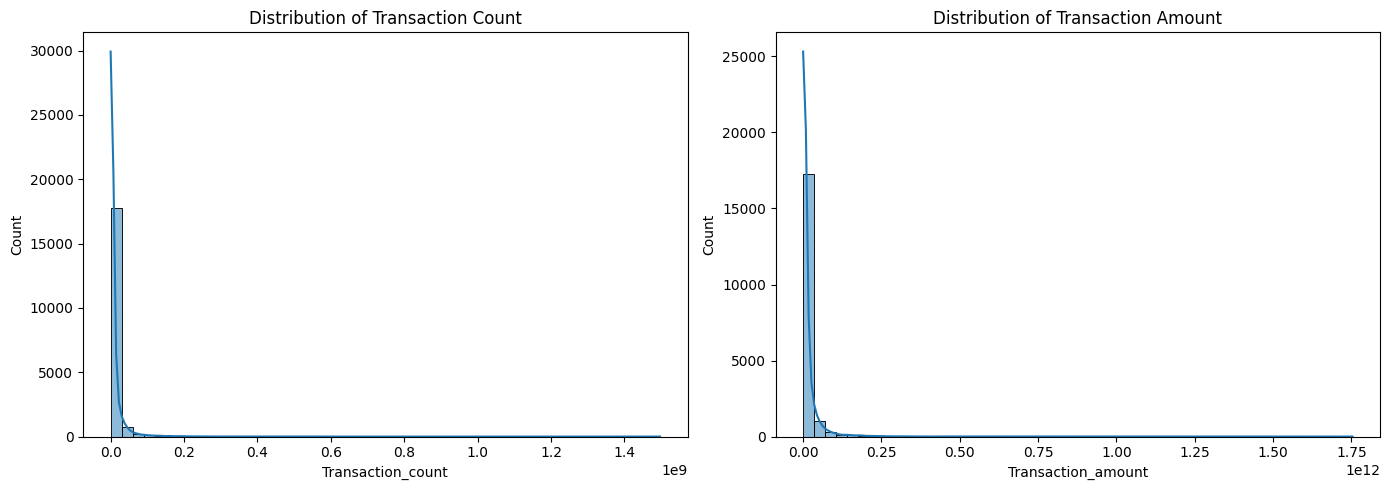

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
 
sns.histplot(df_mt1['Transaction_count'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Transaction Count')

sns.histplot(df_mt1['Transaction_amount'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Transaction Amount')

plt.tight_layout()
plt.show()

* Bivarient and Multivarient Analysis

In [9]:
#correlation analysis between numerical columns
df_numeric = df_mt1.select_dtypes(include=[float, int])
df1 = df_numeric.corr()
print(df1)

                    Transaction_count  Transaction_amount
Transaction_count            1.000000            0.980544
Transaction_amount           0.980544            1.000000


Transaction_Count and Transaction_Aamount: Correlation is 0.980 (very strong positive correlation)

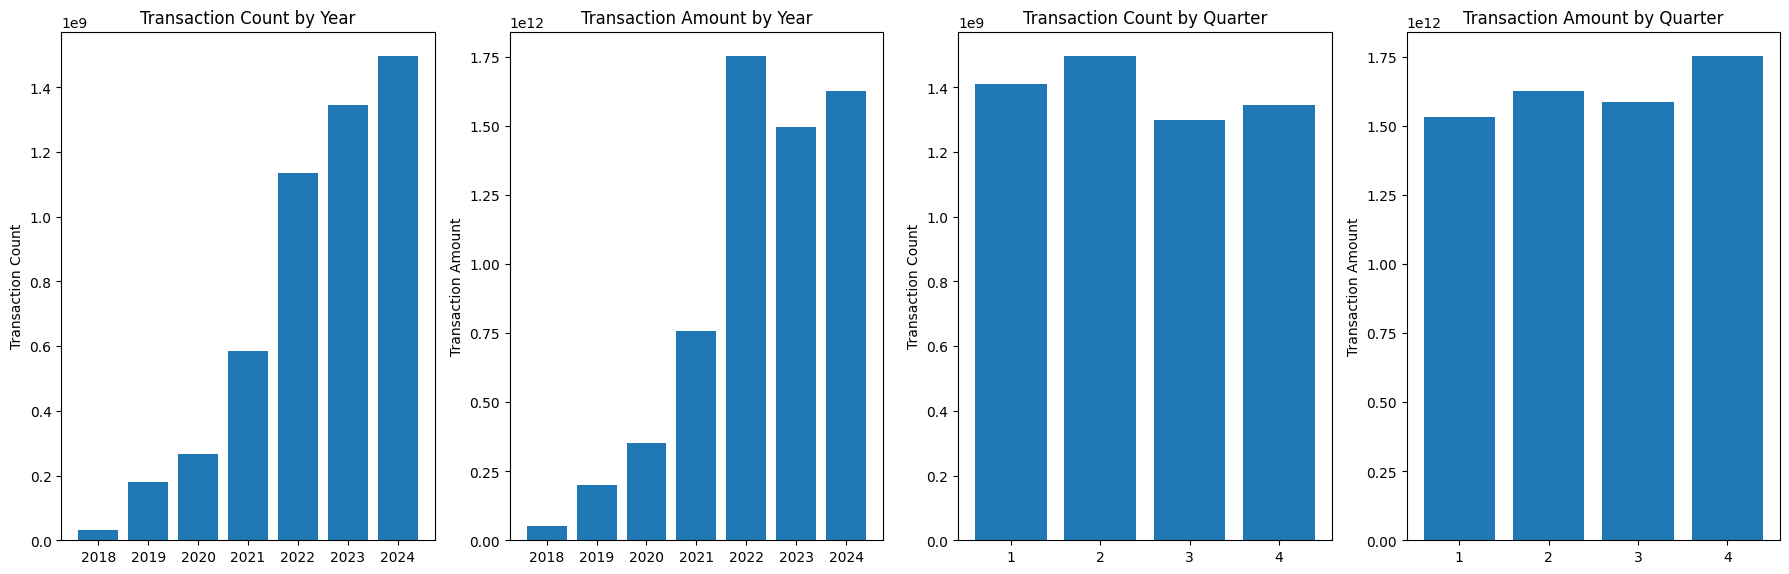

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].bar(df_mt1["Year"], df_mt1["Transaction_count"])
axes[0].set_title('Transaction Count by Year')
axes[0].set_ylabel('Transaction Count')

axes[1].bar(df_mt1["Year"], df_mt1["Transaction_amount"])
axes[1].set_title('Transaction Amount by Year')
axes[1].set_ylabel('Transaction Amount')

axes[2].bar(df_mt1["Quarter"], df_mt1["Transaction_count"])
axes[2].set_title('Transaction Count by Quarter')
axes[2].set_ylabel('Transaction Count')

axes[3].bar(df_mt1["Quarter"], df_mt1["Transaction_amount"])
axes[3].set_title('Transaction Amount by Quarter')
axes[3].set_ylabel('Transaction Amount')

plt.tight_layout()
plt.show()

In [11]:
# Creating cross table using groupby
cross_table = df_mt1.groupby(['State']).agg(
    Total_Transaction_count=('Transaction_count', 'sum'),
    Total_Transaction_amount=('Transaction_amount', 'sum')
).reset_index()
cross_table = cross_table.sort_values(by='Total_Transaction_amount', ascending=False)

display(cross_table)

,State,Total_Transaction_count,Total_Transaction_amount
31,Telangana,20742095154,3.424559e+13
15,Karnataka,24254755760,3.261970e+13
20,Maharashtra,25063572898,3.253590e+13
1,Andhra Pradesh,14530879817,2.799042e+13
28,Rajasthan,13129663316,2.107793e+13
33,Uttar Pradesh,13692757629,2.095363e+13
19,Madhya Pradesh,10849035767,1.536089e+13
4,Bihar,8028482926,1.402214e+13
35,West Bengal,6879447560,1.216642e+13
30,Tamil Nadu,6197425448,9.797807e+12


In [12]:
df_mu = pd.read_csv(r"C:\Users\hi\Downloads\PHONE PE\Extracted_tables\5 Map User.csv")

* Data Profoling

In [13]:
print("shape",df_mu.shape)
display(df_mu.head(5))
print("_______________________________________________________________________________________________________")
print("---- CHECKING NULL VALUES ----")
print(df_mu.isnull().sum()) 
print("_______________________________________________________________________________________________________")
print("---- DROP NULL VALUES ----")
display(df_mu.drop_duplicates())
print("_______________________________________________________________________________________________________")
print("---- SUMMARY STATISTICS ----")
display(df_mu.describe())
print("_______________________________________________________________________________________________________")
print("---- CHECKING DATATYPES ----")
print(df_mu.dtypes)

shape (19032, 6)


,State,Year,Quarter,District,Registered_users,App_opens
0,Andaman And Nicobar Islands,2018,1,north and middle andaman district,632,0
1,Andaman And Nicobar Islands,2018,1,south andaman district,5846,0
2,Andaman And Nicobar Islands,2018,1,nicobars district,262,0
3,Andaman And Nicobar Islands,2018,2,north and middle andaman district,911,0
4,Andaman And Nicobar Islands,2018,2,south andaman district,8143,0


_______________________________________________________________________________________________________
---- CHECKING NULL VALUES ----
State               0
Year                0
Quarter             0
District            0
Registered_users    0
App_opens           0
dtype: int64
_______________________________________________________________________________________________________
---- DROP NULL VALUES ----


,State,Year,Quarter,District,Registered_users,App_opens
0,Andaman And Nicobar Islands,2018,1,north and middle andaman district,632,0
1,Andaman And Nicobar Islands,2018,1,south andaman district,5846,0
2,Andaman And Nicobar Islands,2018,1,nicobars district,262,0
3,Andaman And Nicobar Islands,2018,2,north and middle andaman district,911,0
4,Andaman And Nicobar Islands,2018,2,south andaman district,8143,0
...,...,...,...,...,...,...
19027,West Bengal,2024,2,nadia district,1737326,14549939
19028,West Bengal,2024,2,birbhum district,1099269,38692858
19029,West Bengal,2024,2,purba medinipur district,1721598,18370486
19030,West Bengal,2024,2,maldah district,1231444,42755282


_______________________________________________________________________________________________________
---- SUMMARY STATISTICS ----


,Year,Quarter,Registered_users,App_opens
count,19032.000000,19032.000000,1.903200e+04,1.903200e+04
mean,2020.769231,2.423077,4.050773e+05,1.701040e+07
std,1.887410,1.115414,7.775812e+05,3.636644e+07
min,2018.000000,1.000000,2.200000e+01,0.000000e+00
25%,2019.000000,1.000000,5.820425e+04,2.985982e+05
50%,2021.000000,2.000000,1.845715e+05,4.962703e+06
75%,2022.000000,3.000000,4.545698e+05,1.836708e+07
max,2024.000000,4.000000,1.812748e+07,1.137875e+09


_______________________________________________________________________________________________________
---- CHECKING DATATYPES ----
State               object
Year                 int64
Quarter              int64
District            object
Registered_users     int64
App_opens            int64
dtype: object


In [14]:
df_mu1 = df_mu.copy()
df_mu1['Year']=df_mu1['Year'].astype(str)
df_mu1['Quarter']=df_mu1['Quarter'].astype(str)
display(df_mu1.dtypes)

State               object
Year                object
Quarter             object
District            object
Registered_users     int64
App_opens            int64
dtype: object

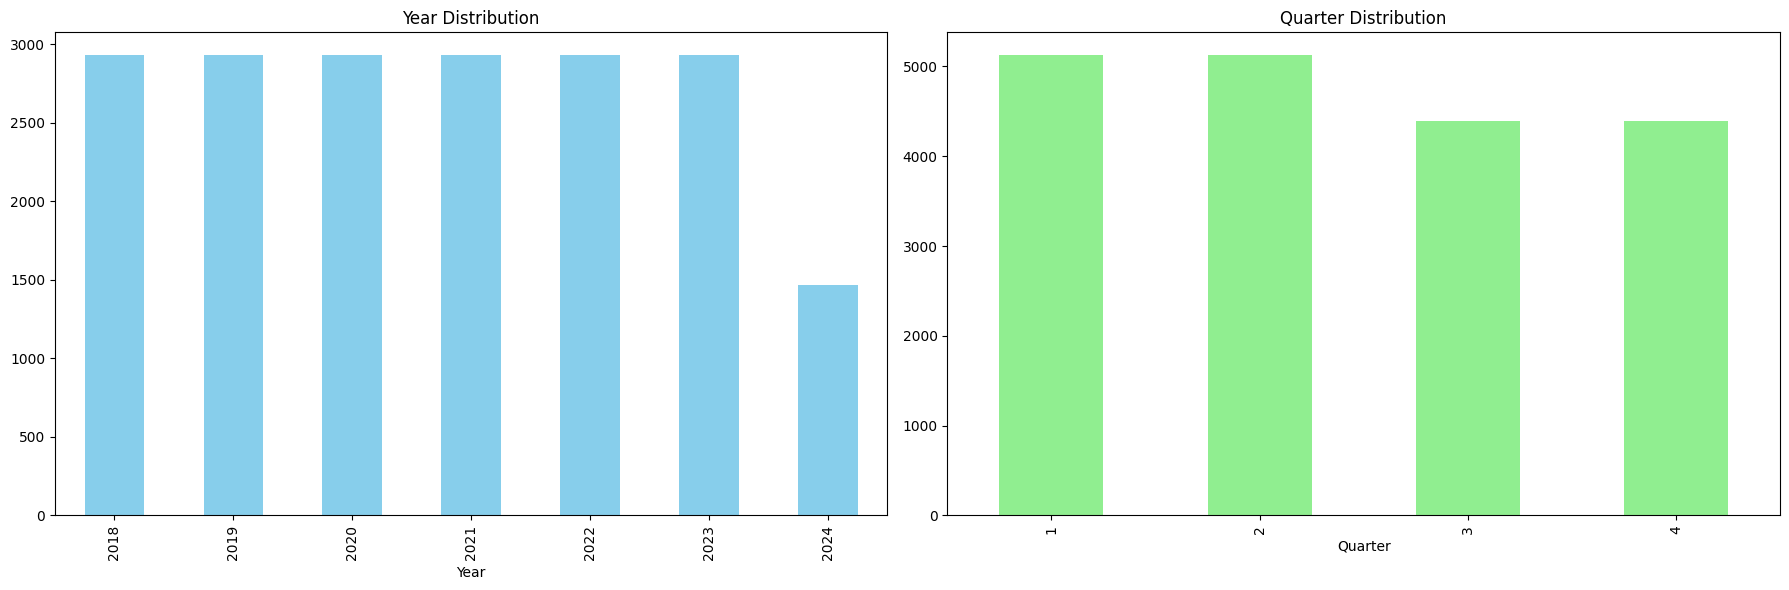

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
df_mu1['Year'].value_counts().plot.bar(ax=axs[0], color='skyblue')
axs[0].set_title('Year Distribution')

df_mu1['Quarter'].value_counts().plot.bar(ax=axs[1], color='lightgreen')
axs[1].set_title('Quarter Distribution')

plt.tight_layout()
plt.show()

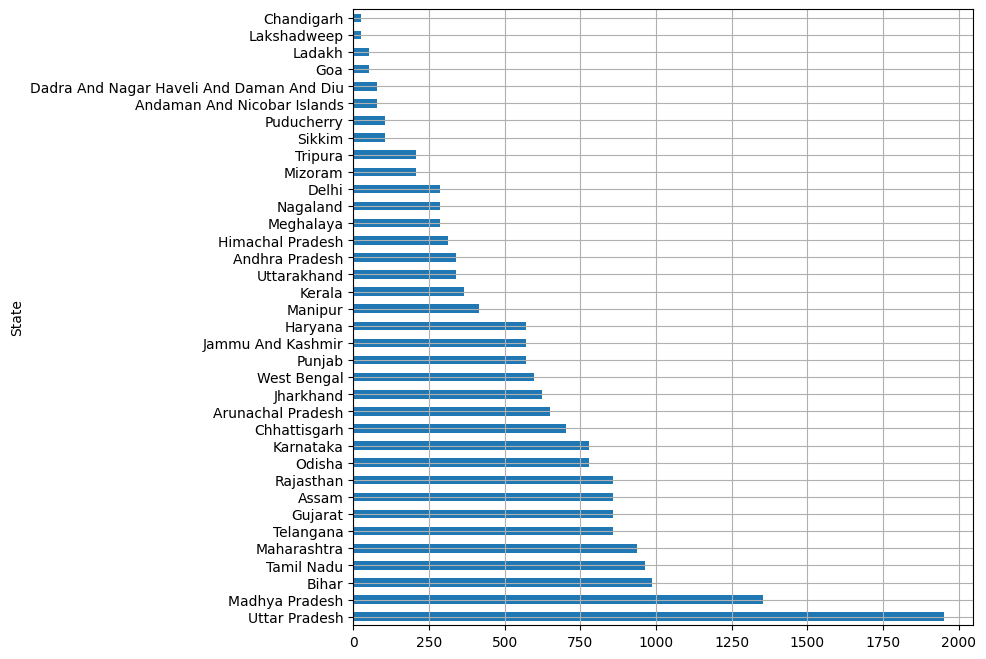

In [16]:
plt.figure(figsize=(8, 8))
df_mu1['State'].value_counts().plot.barh()
plt.grid(True)

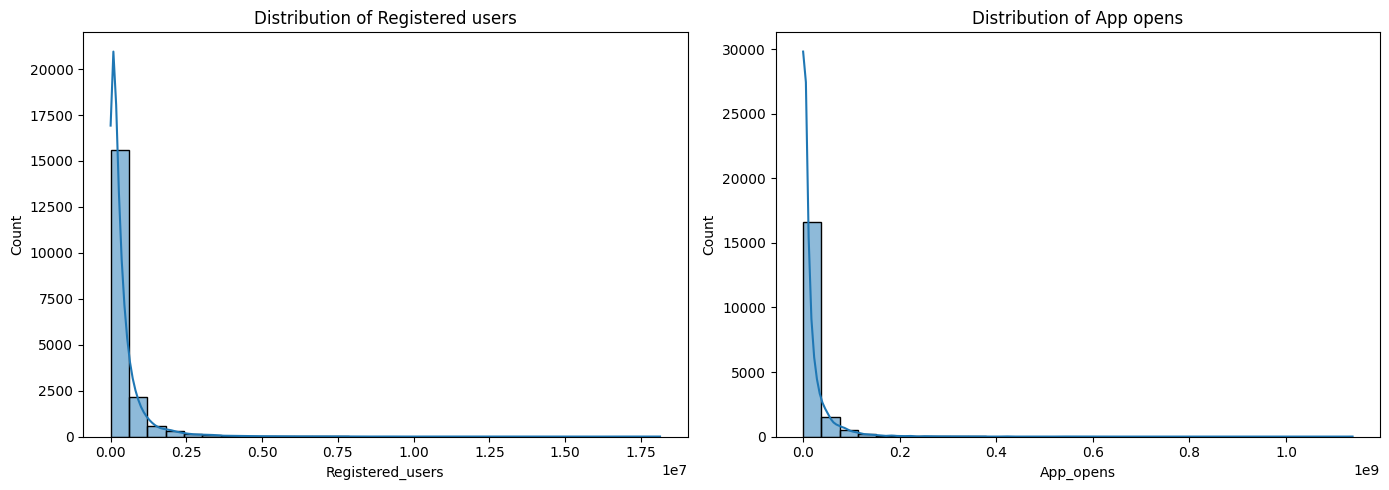

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
 
sns.histplot(df_mu1['Registered_users'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Registered users')

sns.histplot(df_mu1['App_opens'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of App opens')

plt.tight_layout()
plt.show()

* Bivarient & Multivarient Analysis

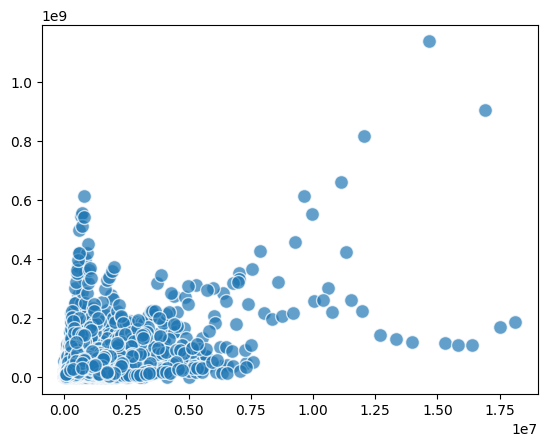

In [18]:
# Relation between transaction count & transaction amount 
plt.scatter( df_mu1['Registered_users'],df_mu1['App_opens'], alpha=0.7, edgecolors='w', s=100)

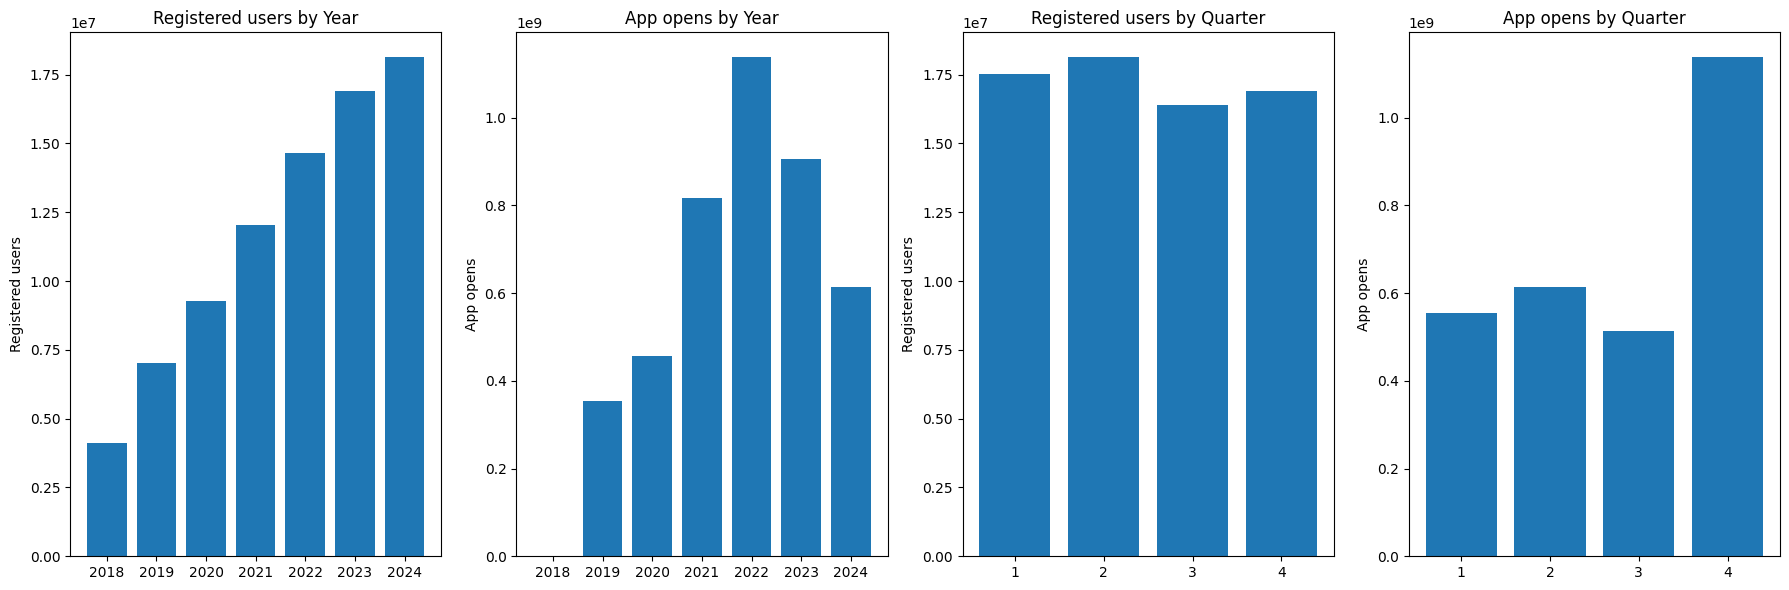

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].bar(df_mu1["Year"], df_mu1["Registered_users"])
axes[0].set_title('Registered users by Year')
axes[0].set_ylabel('Registered users')

axes[1].bar(df_mu1["Year"], df_mu1["App_opens"])
axes[1].set_title('App opens by Year')
axes[1].set_ylabel('App opens')

axes[2].bar(df_mu1["Quarter"], df_mu1["Registered_users"])
axes[2].set_title('Registered users by Quarter')
axes[2].set_ylabel('Registered users')

axes[3].bar(df_mu1["Quarter"], df_mu1["App_opens"])
axes[3].set_title('App opens by Quarter')
axes[3].set_ylabel('App opens')

plt.tight_layout()
plt.show()

In [20]:
# Creating cross table using groupby
cross_table = df_mu1.groupby(['State']).agg(
    Total_Registered_users=('Registered_users', 'sum'),
    Total_app_opens=('App_opens', 'sum')
).reset_index()
cross_table = cross_table.sort_values(by='Total_Registered_users', ascending=False)
display(cross_table)

,State,Total_Registered_users,Total_app_opens
20,Maharashtra,998689277,40002682855
33,Uttar Pradesh,803938033,25643570559
15,Karnataka,643208192,32521554203
1,Andhra Pradesh,497617392,21201237894
28,Rajasthan,483362947,40407715064
31,Telangana,462117422,19785877608
35,West Bengal,456601349,8239013741
30,Tamil Nadu,439554953,13524810999
19,Madhya Pradesh,406022880,31902623952
10,Gujarat,400210917,15500909297
